In [115]:
#import dependencies
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#load json review file
file = open('yelp_dataset/review.json')

In [46]:
#read lines in file into list
total_list = [line for line in file.readlines()]

In [47]:
#load json objects into list
json_list = [json.loads(row) for row in total_list]

In [48]:
#pull desired columns into dataframe
trimmed = []
for row in json_list:
    newrow = {}
    newrow['business_id'] = row['business_id']
    newrow['stars'] = row['stars']
    newrow['text'] = row['text']
    trimmed.append(newrow)
reviews = pd.DataFrame(trimmed)
reviews.head()

,business_id,stars,text
0,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...


In [63]:
#repeat process for business json to get business names for reviews
file = open('yelp_dataset/business.json')
total_list = [line for line in file.readlines()]
json_list = [json.loads(row) for row in total_list]
trimmed = []
for row in json_list:
    newrow = {}
    newrow['business_id'] = row['business_id']
    newrow['business_name'] = row['name']
    newrow['city'] = row['city']
    newrow['state'] = row['state']
    newrow['review_count'] = row['review_count']
    trimmed.append(newrow)
df = pd.DataFrame(trimmed)

In [68]:
#isolate Pheonix, Arizona businesses
business_df = df.loc[df['state'] == 'AZ']
business_df = df.loc[df['city'] == 'Phoenix']

In [249]:
#visualize business and reviews dataframes before merging
business_df.head()

,business_id,business_name,city,review_count,state
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,5,AZ
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,18,AZ
31,mNBp4KI2goFJKDB9VLGP9w,JSE Automotive Services,Phoenix,4,AZ
54,c-BELKj0SvNhBesQMf-bKw,Circle K,Phoenix,3,AZ
68,Y0dRlYjRNWckjvTGd55hzg,M Catering by Michael's,Phoenix,7,AZ


In [38]:
reviews

,business_id,stars,text
0,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...
2,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...
5,eU_713ec6fTGNO4BegRaww,4.0,I'll be the first to admit that I was not exci...
6,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...
7,zvO-PJCpNk4fgAVUnExYAA,1.0,This place has gone down hill. Clearly they h...
8,b2jN2mm9Wf3RcrZCgfo1cg,2.0,I was really looking forward to visiting after...
9,oxwGyA17NL6c5t1Etg5WgQ,3.0,It's a giant Best Buy with 66 registers. I do...


In [71]:
#merge business and review dataframes on business_id
df = pd.merge(reviews, business_df, on='business_id')
df

,business_id,stars,text,business_name,city,review_count,state
0,cHdJXLlKNWixBXpDwEGb_A,3.0,I love chinese food and I love mexican food. W...,Chino Bandido,Phoenix,1600,AZ
1,cHdJXLlKNWixBXpDwEGb_A,5.0,A must go destination in Phoenix.\nChinese - M...,Chino Bandido,Phoenix,1600,AZ
2,cHdJXLlKNWixBXpDwEGb_A,4.0,"Second time I have been here, and the only re...",Chino Bandido,Phoenix,1600,AZ
3,cHdJXLlKNWixBXpDwEGb_A,4.0,I was brought here by my coworkers. It's becom...,Chino Bandido,Phoenix,1600,AZ
4,cHdJXLlKNWixBXpDwEGb_A,4.0,Very interesting! I've tried korean/mexican fu...,Chino Bandido,Phoenix,1600,AZ
5,cHdJXLlKNWixBXpDwEGb_A,5.0,When you face the age-old dilemma of Chinese o...,Chino Bandido,Phoenix,1600,AZ
6,cHdJXLlKNWixBXpDwEGb_A,3.0,Don't be fooled - this place is not a fusion o...,Chino Bandido,Phoenix,1600,AZ
7,cHdJXLlKNWixBXpDwEGb_A,5.0,First time trying out Asian style with Mexican...,Chino Bandido,Phoenix,1600,AZ
8,cHdJXLlKNWixBXpDwEGb_A,3.0,"My husband loves their food, but it is just ok...",Chino Bandido,Phoenix,1600,AZ
9,cHdJXLlKNWixBXpDwEGb_A,5.0,I have heard of the place for a while and have...,Chino Bandido,Phoenix,1600,AZ


In [273]:
#load Pheonix health inspection scores csv into dataframe and clean by removing unwanted data
input_data_file = "bestaurants/Pheonix_scores.csv"
health_df = pd.read_csv(input_data_file)
health_df = health_df.dropna(how='all')
health_df = health_df.drop(['Address','Permit Id','Class','Inspection Date','Inspection Type','Priority Violation *','Unnamed: 10'], axis = 1)
health_df = health_df.loc[health_df['City'] == 'Phoenix']
health_df = health_df.rename(index=str, columns={"Business Name": "business_name"})
health_df = health_df[health_df.Grade != 'Not Participating']
health_df





,business_name,City,Type,Grade
5,Alhambra School Dist No 68,Phoenix,Food Jobber,A
7,Alhambra S D O Snack Bar,Phoenix,School Food Service,A
10,O'Connor's Pub,Phoenix,E & D 10+ Seating,A
21,Pete's Fish & Chips,Phoenix,E & D 10+ Seating,A
22,Red Devil Italian Restaurant,Phoenix,E & D 10+ Seating,B
25,Gold Key Racquet Club,Phoenix,E & D 10+ Seating,A
29,Target Store No t851,Phoenix,E & D 10+ Seating,A
30,Target Store No t851,Phoenix,Retail Food Establishment,A
36,Burger King No 4676,Phoenix,E & D 10+ Seating,A
37,Frys Food Store No 128,Phoenix,Bakery,A


In [206]:
#merge health and combined review/businesses dataframes
merged_health = pd.merge(df, health_df, on='business_name')
merged_health = merged_health.drop(['business_id','stars','City','review_count','state','Type'],axis=1)
merged_health

,text,business_name,city,Grade
0,Amazing pizza!!! Although they did forget my c...,Barro's Pizza,Phoenix,A
1,Firts time trying out this place and it was a ...,Barro's Pizza,Phoenix,A
2,We order from Barros about 2-3 times a month. ...,Barro's Pizza,Phoenix,A
3,Been going to Barro's since they began. It's ...,Barro's Pizza,Phoenix,A
4,Not sure why such high reviews. Other than th...,Barro's Pizza,Phoenix,A
5,Ordered out there for the first time.\nGreat p...,Barro's Pizza,Phoenix,A
6,this is one of my favorite places to eat! as a...,Barro's Pizza,Phoenix,A
7,We've been to this Barro's countless times as ...,Barro's Pizza,Phoenix,A
8,we have just moved here recently and this is t...,Barro's Pizza,Phoenix,A
9,This location needs help. The pizza is good bu...,Barro's Pizza,Phoenix,A


In [207]:
#define function for splitting text into words and determing if text conatins a keyword
def contains(text, keyword):
        words = text.split()
        for word in words:
            if word == keyword:
                return True
        return False

In [208]:
#loop through dataframe to determine if text contains keyword and then categorize it accordingly
cat_list = []
for i in range(len(merged_health)):
    text = merged_health.iloc[i]['text']
    if any((contains(text,'sick'),contains(text,'ill'),contains(text,'poisoning'),contains(text,'vomit'),contains(text,'diarrhea'))) and any((contains(text,'gross'),contains(text,'dirty'), contains(text,'disgusting'),contains(text,'filthy'))):
        cat_list.append(3)
    elif any((contains(text,'sick'),contains(text,'ill'),contains(text,'poisoning'),contains(text,'vomit'),contains(text,'diarrhea'))):
        cat_list.append(2)
    elif any((contains(text,'gross'),contains(text,'dirty'),contains(text,'disgusting'),contains(text,'filthy'))):
        cat_list.append(1)
    else: 
        cat_list.append(0)


In [209]:
merged_health['Cat'] = pd.DataFrame(cat_list)
merged_health

,text,business_name,city,Grade,Cat
0,Amazing pizza!!! Although they did forget my c...,Barro's Pizza,Phoenix,A,0
1,Firts time trying out this place and it was a ...,Barro's Pizza,Phoenix,A,0
2,We order from Barros about 2-3 times a month. ...,Barro's Pizza,Phoenix,A,0
3,Been going to Barro's since they began. It's ...,Barro's Pizza,Phoenix,A,0
4,Not sure why such high reviews. Other than th...,Barro's Pizza,Phoenix,A,0
5,Ordered out there for the first time.\nGreat p...,Barro's Pizza,Phoenix,A,0
6,this is one of my favorite places to eat! as a...,Barro's Pizza,Phoenix,A,0
7,We've been to this Barro's countless times as ...,Barro's Pizza,Phoenix,A,0
8,we have just moved here recently and this is t...,Barro's Pizza,Phoenix,A,0
9,This location needs help. The pizza is good bu...,Barro's Pizza,Phoenix,A,0


In [194]:
#determine number of reviews falling under each health inspection score
grade_counts = merged_health['Grade'].value_counts()
grade_counts

B    7077
A    6372
C     253
Name: Grade, dtype: int64

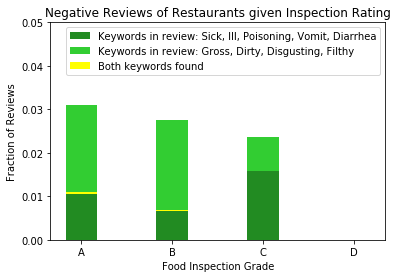

In [296]:
#count reviews in category by grade, then plot
counts = np.zeros((4,4))
for i in range(0, len(merged_health)):
    index = int(merged_health.iloc[i]['Cat'])
    if merged_health.iloc[i]['Grade'] == 'A':
        counts[index, 0] +=1
    elif merged_health.iloc[i]['Grade'] == 'B':
        counts[index, 1] += 1
    elif merged_health.iloc[i]['Grade'] == 'C':
        counts[index, 2] +=1
    elif merged_health.iloc[i]['Grade'] == 'D':
        counts[index, 3] +=1

sick_scores = counts[2, :]
sick_scores = sick_scores/np.array([7077,6372,253,1])
dirty_scores = counts[1, :]
dirty_scores = dirty_scores/np.array([7077,6372,253,1])
both_scores = counts[3, :]
both_scores = both_scores/np.array([7077,6372,253,1])
N = 4
fig = plt.figure()
#max_y = max(np.amax(sick_scores), np.amax(dirty_scores), np.amax(both_scores) ) #highest frequency of an occurance in the bar chart
x = np.arange(N) # the x locations for the bars
width = 0.35 #the width of the bars 
p1 = plt.bar(x, sick_scores, width, color = 'forestgreen')
p2 = plt.bar(x, dirty_scores, width, bottom = sick_scores, color = 'limegreen')
p3 = plt.bar(x, both_scores, width, bottom = sick_scores, color = 'yellow')


plt.xlabel('Food Inspection Grade')
plt.ylabel('Fraction of Reviews')
plt.title('Negative Reviews of Restaurants given Inspection Rating')
plt.xticks(x, ('A', 'B', 'C', 'D'))
plt.legend((p1[0], p2[0], p3[0]), ('Keywords in review: Sick, Ill, Poisoning, Vomit, Diarrhea', 'Keywords in review: Gross, Dirty, Disgusting, Filthy', 'Both keywords found'),loc='best')
plt.ylim(0,0.05)
plt.savefig('yelp_review.png')

